## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns


# pd.set_option('display.max_columns',30)
# pd.set_option('display.max_rows',500)

## Load the Dataset

In [2]:
train_data=pd.read_csv('kowope/Train/train.csv')
test_data = pd.read_csv('kowope/Test/Test.csv')

In [3]:
train_data.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium
0,274711,Male,22,1,40.0,0,< 1 Year,Yes,152.0,203,25455.0
1,216540,Female,26,1,8.0,1,< 1 Year,No,26.0,45,38393.0
2,78984,Female,32,1,28.0,0,< 1 Year,Yes,122.0,35,32118.0
3,218369,Male,32,1,37.0,0,< 1 Year,Yes,152.0,215,37711.0
4,307216,Female,24,1,28.0,0,< 1 Year,Yes,156.0,222,48706.0


In [4]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage
0,16222,Male,54,1,28.0,0,> 2 Years,Yes,26.0,53
1,342481,Female,26,1,3.0,0,1-2 Year,Yes,156.0,280
2,20916,Male,25,1,28.0,0,< 1 Year,Yes,124.0,255
3,38704,Male,29,1,24.0,0,1-2 Year,Yes,157.0,235
4,363809,Female,28,1,28.0,0,< 1 Year,Yes,26.0,243


**Observation**
*  'Annual_Premium' only is omitted in test_data

#### Description of each of the column headers in the data frame
id: randomly generated numbers for customer

Gender: Gender of customer

Age: age of customer

Driving_licence: if customer has driving licence or not (yes=1, no=0)

Region_Code: region code of customer

Previously_Insured: if customer was previously insured or not (yes=1, no=0)

Vehicle_Age: age of customer's vehicle (< 1 year, 1-2 year, or >2 years)

Vehicle_Damage: if customer's vehicle has been damaged or not (yes=1, no=0)

Policy_sales_channel: No. of sales channel

vintage: vintage

Annual_Premium: Annual premium boutght by customer


## Exploratory Data Analysis (EDA)

In [5]:
#Get the shape of the datasets
print('train size', train_data.shape)
print('train size',test_data.shape)

train size (304887, 11)
train size (76222, 10)


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    304887 non-null  int64  
 1   Gender                304887 non-null  object 
 2   Age                   304887 non-null  int64  
 3   Driving_License       304887 non-null  int64  
 4   Region_Code           304887 non-null  float64
 5   Previously_Insured    304887 non-null  int64  
 6   Vehicle_Age           304887 non-null  object 
 7   Vehicle_Damage        304887 non-null  object 
 8   Policy_Sales_Channel  304887 non-null  float64
 9   Vintage               304887 non-null  int64  
 10  Annual_Premium        304887 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 25.6+ MB


In [7]:
#get a statistical summary of the dataset
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Vintage,Annual_Premium
count,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000
mean,190738.657112,38.826897,0.997855,26.396239,0.458127,112.053859,154.392214,30591.308311
std,110004.367239,15.515299,0.046265,13.228749,0.498244,54.189288,83.670312,17239.285689
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,10.000000,2630.000000
25%,95504.500000,25.000000,1.000000,15.000000,0.000000,29.000000,82.000000,24403.000000
50%,190886.000000,36.000000,1.000000,28.000000,0.000000,134.000000,154.000000,31697.000000
75%,285863.500000,49.000000,1.000000,35.000000,1.000000,152.000000,227.000000,39443.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,163.000000,299.000000,540165.000000


In [8]:
train_data.nunique()

id                      304887
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Policy_Sales_Channel       154
Vintage                    290
Annual_Premium           46479
dtype: int64

In [9]:
# Finding count of null values in each of the columns in data
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Policy_Sales_Channel    0
Vintage                 0
Annual_Premium          0
dtype: int64

In [10]:
test_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

**Observation**
*   No Null Values in both train and test dataset 
*   'Gender', 'Vehicle_Age', and 'Vehicle_Damage' columns of 'object' dtype . so we need check the unique values of those columns, if any string values is present.


**Observation**

'Gender', 'Vehicle_Age', 'Vehicle_Damage' columns have few string values. We need to replace the string with corresponding int values.

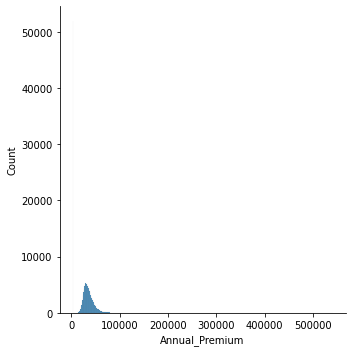

In [11]:
# sns.pairplot(train_data[1000:-1])
sns.displot(train_data['Annual_Premium'])
# dt = sns.load_dataset('kowope/Train/train.csv')
# dt.head()

C:\Users\hp\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\Anac

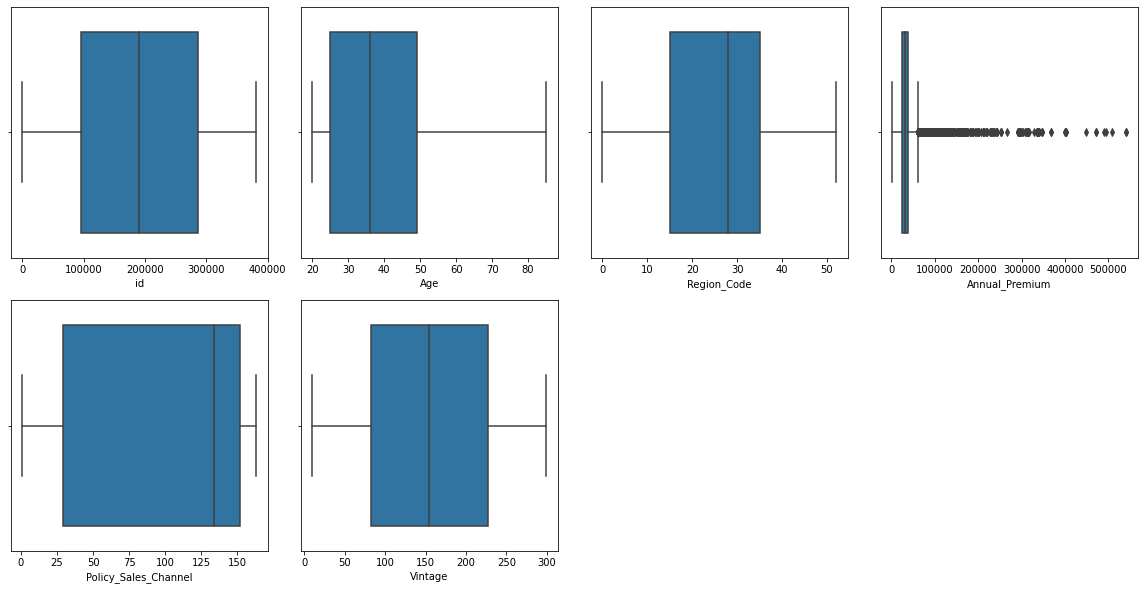

In [12]:
plt.figure(figsize=(16,16))
for i, col in enumerate(["id","Age", "Region_Code","Annual_Premium","Policy_Sales_Channel", "Vintage"]):
    plt.subplot(4,4,i+1)
    sns.boxplot(train_data[col])
    plt.tight_layout()

In [13]:
# check  if id values are unique or not
for i in train_data['id']:
    if i==test_data['id'][67]:
        print('yes')

In [14]:
print("Unique Values in 'Gender' column are ",train_data['Gender'].unique())
print("Unique Values in 'Vehicle_Age' column are ",train_data['Vehicle_Age'].unique())
print("Unique Values in 'Vehicle_Damage' column are ",train_data['Vehicle_Damage'].unique())


Unique Values in 'Gender' column are  ['Male' 'Female']
Unique Values in 'Vehicle_Age' column are  ['< 1 Year' '1-2 Year' '> 2 Years']
Unique Values in 'Vehicle_Damage' column are  ['Yes' 'No']


In [15]:
# Checking frequency of each values in categorical columns 'job_type','marital_status',education_level','communication' 
# & 'outcome' columns
train_data.Gender.value_counts()

Male      164780
Female    140107
Name: Gender, dtype: int64

In [16]:
train_data.Vehicle_Age.value_counts()

1-2 Year     160195
< 1 Year     131852
> 2 Years     12840
Name: Vehicle_Age, dtype: int64

In [17]:
train_data.Vehicle_Damage.value_counts()

Yes    153959
No     150928
Name: Vehicle_Damage, dtype: int64

In [18]:
train_data.Driving_License.value_counts()

1    304233
0       654
Name: Driving_License, dtype: int64

## Data Cleaning and Data Preprocessing

### Converting Non Numeric Data Columns to Numeric Coulumns 
As the model built for prediction understands numerical data columns better,we need to convert categorical data columns to 
numerical data columns by using dummy columns and one hot encoding methods

In [19]:
mapping_dict = {
    "Gender": {
        "Male": 0,
        "Female": 1
    },
    "Vehicle_Damage": {
        "No": 0,
        "Yes": 1
    },
    # "Vehicle_Age": {
    #     "< 1 Year": 0, 
    #     "1-2 Year": 1,
    #     "> 2 Years": 2,
    # }
}





In [20]:
filtered_train_data = train_data.replace(mapping_dict)
filtered_train_data[['Gender', 'Vehicle_Damage']]
filtered_train_data = pd.get_dummies(filtered_train_data, columns=['Vehicle_Age'])


In [21]:
filtered_test_data = test_data.replace(mapping_dict)
filtered_test_data[['Gender', 'Vehicle_Damage']]
filtered_test_data = pd.get_dummies(filtered_test_data, columns=['Vehicle_Age'])

In [22]:
filtered_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     304887 non-null  int64  
 1   Gender                 304887 non-null  int64  
 2   Age                    304887 non-null  int64  
 3   Driving_License        304887 non-null  int64  
 4   Region_Code            304887 non-null  float64
 5   Previously_Insured     304887 non-null  int64  
 6   Vehicle_Damage         304887 non-null  int64  
 7   Policy_Sales_Channel   304887 non-null  float64
 8   Vintage                304887 non-null  int64  
 9   Annual_Premium         304887 non-null  float64
 10  Vehicle_Age_1-2 Year   304887 non-null  uint8  
 11  Vehicle_Age_< 1 Year   304887 non-null  uint8  
 12  Vehicle_Age_> 2 Years  304887 non-null  uint8  
dtypes: float64(3), int64(7), uint8(3)
memory usage: 24.1 MB


In [23]:
filtered_train_data = filtered_train_data.rename(columns={
    "Vehicle_Age_1-2 Year":"Vehicle_Age_1_2_Year",
    "Vehicle_Age_< 1 Year":"Vehicle_Age_lt_1_Year",
    "Vehicle_Age_> 2 Years":"Vehicle_Age_gt_2_Years"
})
filtered_train_data["Vehicle_Age_lt_1_Year"]=filtered_train_data["Vehicle_Age_lt_1_Year"].astype('int')
filtered_train_data["Vehicle_Age_1_2_Year"]=filtered_train_data["Vehicle_Age_1_2_Year"].astype('int')
filtered_train_data["Vehicle_Age_gt_2_Years"]=filtered_train_data["Vehicle_Age_gt_2_Years"].astype('int')
filtered_train_data["Vehicle_Damage"]=filtered_train_data["Vehicle_Damage"].astype('int')

In [24]:
filtered_test_data = filtered_test_data.rename(columns={
    "Vehicle_Age_1-2 Year":"Vehicle_Age_1_2_Year",
    "Vehicle_Age_< 1 Year":"Vehicle_Age_lt_1_Year",
    "Vehicle_Age_> 2 Years":"Vehicle_Age_gt_2_Years"
})
filtered_test_data["Vehicle_Age_lt_1_Year"]=filtered_test_data["Vehicle_Age_lt_1_Year"].astype('int')
filtered_test_data["Vehicle_Age_1_2_Year"]=filtered_test_data["Vehicle_Age_1_2_Year"].astype('int')
filtered_test_data["Vehicle_Age_gt_2_Years"]=filtered_test_data["Vehicle_Age_gt_2_Years"].astype('int')
filtered_test_data["Vehicle_Damage"]=filtered_test_data["Vehicle_Damage"].astype('int')

### removing outliers

In [25]:
filtered_train_data.loc[filtered_train_data.Annual_Premium > 400000, "Annual_Premium"] = 400000

In [26]:
filtered_train_data = filtered_train_data.drop(['id'], axis=1)
# filtered_train_data.dropna()

In [27]:
filtered_train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium,Vehicle_Age_1_2_Year,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years
0,0,22,1,40.0,0,1,152.0,203,25455.0,0,1,0
1,1,26,1,8.0,1,0,26.0,45,38393.0,0,1,0
2,1,32,1,28.0,0,1,122.0,35,32118.0,0,1,0
3,0,32,1,37.0,0,1,152.0,215,37711.0,0,1,0
4,1,24,1,28.0,0,1,156.0,222,48706.0,0,1,0


In [28]:
filtered_train_data.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium,Vehicle_Age_1_2_Year,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years
count,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000
mean,0.459537,38.826897,0.997855,26.396239,0.458127,0.504971,112.053859,154.392214,30588.781565,0.525424,0.432462,0.042114
std,0.498361,15.515299,0.046265,13.228749,0.498244,0.499976,54.189288,83.670312,17177.346735,0.499354,0.495418,0.200849
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,2630.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,29.000000,82.000000,24403.000000,0.000000,0.000000,0.000000
50%,0.000000,36.000000,1.000000,28.000000,0.000000,1.000000,134.000000,154.000000,31697.000000,1.000000,0.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,152.000000,227.000000,39443.000000,1.000000,1.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,1.000000,163.000000,299.000000,400000.000000,1.000000,1.000000,1.000000


## Build Machine Learning Model & Evaluate it

In [29]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix, mean_squared_error, mean_absolute_error
import xgboost as xgb


In [30]:
#feature scaling
#normalize the "Age" and "Vintage" features with standardization
ss =StandardScaler()
num_feat = ['Age', 'Vintage']
filtered_train_data[num_feat] = ss.fit_transform(filtered_train_data[num_feat])
filtered_test_data[num_feat] = ss.fit_transform(filtered_test_data[num_feat])

#normalize "Annual_Premium" with min-max scaling
mm = MinMaxScaler()
filtered_train_data[['Annual_Premium']] = mm.fit_transform(filtered_train_data[['Annual_Premium']])
filtered_train_data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium,Vehicle_Age_1_2_Year,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years
0,0,-1.084538,1,40.0,0,1,152.0,0.580945,0.057440,0,1,0
1,1,-0.826727,1,8.0,1,0,26.0,-1.307422,0.089999,0,1,0
2,1,-0.440011,1,28.0,0,1,122.0,-1.426939,0.074208,0,1,0
3,0,-0.440011,1,37.0,0,1,152.0,0.724365,0.088283,0,1,0
4,1,-0.955632,1,28.0,0,1,156.0,0.808027,0.115952,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
304882,0,-0.891180,1,47.0,1,1,160.0,-1.152050,0.051287,0,1,0
304883,0,1.944736,1,28.0,0,1,26.0,1.620742,0.072980,1,0,0
304884,0,-0.955632,1,28.0,0,0,152.0,-1.104243,0.142094,0,1,0
304885,1,0.075610,1,8.0,1,0,26.0,1.286095,0.066210,1,0,0


In [31]:
filtered_train_data.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium,Vehicle_Age_1_2_Year,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years
count,304887.000000,3.048870e+05,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,3.048870e+05,304887.000000,304887.000000,304887.000000,304887.000000
mean,0.459537,2.169590e-16,0.997855,26.396239,0.458127,0.504971,112.053859,-6.448526e-17,0.070360,0.525424,0.432462,0.042114
std,0.498361,1.000002e+00,0.046265,13.228749,0.498244,0.499976,54.189288,1.000002e+00,0.043228,0.499354,0.495418,0.200849
min,0.000000,-1.213443e+00,0.000000,0.000000,0.000000,0.000000,1.000000,-1.725731e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.911797e-01,1.000000,15.000000,0.000000,0.000000,29.000000,-8.652093e-01,0.054793,0.000000,0.000000,0.000000
50%,0.000000,-1.822009e-01,1.000000,28.000000,0.000000,1.000000,134.000000,-4.687622e-03,0.073148,1.000000,0.000000,0.000000
75%,1.000000,6.556832e-01,1.000000,35.000000,1.000000,1.000000,152.000000,8.677858e-01,0.092642,1.000000,1.000000,0.000000
max,1.000000,2.975977e+00,1.000000,52.000000,1.000000,1.000000,163.000000,1.728307e+00,1.000000,1.000000,1.000000,1.000000


In [32]:
X =filtered_train_data.drop(['Annual_Premium'], axis = 1)
y = filtered_train_data['Annual_Premium']


### Train and Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 3)


In [34]:
print('xtrain', X_train.shape)
print('ytrain', y_train.shape)
print('xtest', X_test.shape)
print('ytest', y_test.shape)

xtrain (243909, 11)
ytrain (243909,)
xtest (60978, 11)
ytest (60978,)


In [35]:
rf1 = RandomForestRegressor(random_state=1)
rf1.fit(X_train, y_train)
y_pred1 = rf1.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred1)))

0.04100899619245232


In [36]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)#lm1.fit(X_train, y_train)
y_pred = lm1.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.04289074001965307


In [37]:
model=xgb.XGBRegressor(objective='reg:squarederror',learning_rate= 0.1, max_depth=7, n_estimators=300)#objective='reg:squarederror',learning_rate= 0.1, max_depth=7, n_estimators=300)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
# print('mean absolute', mean_absolute_error(y_test, y_predict))
mse = mean_squared_error(y_test, y_predict)
# print('mean squared error', mse)
print('root mean squared error', np.sqrt(mse))

print(y_predict)

root mean squared error 0.037306059685084846
[0.10049621 0.06478452 0.0703342  ... 0.08173221 0.08770123 0.06526171]


### Building ML Model

### On full data for competition

In [38]:
lm2 = LinearRegression()
lm2.fit(X, y)


LinearRegression()

In [39]:
model2=xgb.XGBRegressor(objective='reg:squarederror',learning_rate= 0.1, max_depth=7, n_estimators=300)#objective='reg:squarederror',learning_rate= 0.1, max_depth=7, n_estimators=300)
model2.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Prediction for Test Dataset

In [40]:
#drop the "id" column
test_id = filtered_test_data['id'].to_numpy()
print(test_id)
filtered_test_data = filtered_test_data.drop(['id'], axis = 1)
filtered_test_data

[ 16222 342481  20916 ... 303222 333830 245084]


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Vehicle_Age_1_2_Year,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years
0,0,0.980501,1,28.0,0,1,26.0,-1.209060,0,0,1
1,1,-0.826319,1,3.0,0,1,156.0,1.503816,1,0,0
2,0,-0.890848,1,28.0,0,1,124.0,1.205041,0,1,0
3,0,-0.632731,1,24.0,0,1,157.0,0.966021,1,0,0
4,1,-0.697260,1,28.0,0,1,26.0,1.061629,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
76217,0,0.077091,1,28.0,0,1,124.0,-0.169323,1,0,0
76218,1,0.012562,1,48.0,0,0,124.0,0.284815,1,0,0
76219,0,1.367677,1,28.0,0,1,26.0,1.563571,1,0,0
76220,0,-1.019907,1,15.0,1,0,152.0,-0.671265,0,1,0


In [41]:
predictions = model2.predict(filtered_test_data)
print(predictions)

[0.09831095 0.02479893 0.09748651 ... 0.09714258 0.0757018  0.08505565]


In [42]:
test_pred = lm2.predict(filtered_test_data)

## Saving Prediction File

In [43]:
data = {"id":test_id, "Annual_Premium":predictions}
res= pd.DataFrame(data)
res.index = filtered_test_data.index # for comparision
res.to_csv("prediction_result5.csv", index = False)           